<a href="https://colab.research.google.com/github/MikeRodziewicz/Udemy_ML_Bootcamp/blob/main/scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
import numpy as np 
from sklearn import datasets

np.random.seed(10)
raw_data = datasets.load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(raw_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
data = raw_data.data
target = raw_data.target

In [ ]:
print(data.shape)
print(target.shape)

(150, 4)
(150,)


In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3)

In [ ]:
print(data_train.shape)
print(data_test.shape)
print(target_train.shape)
print(target_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(data_train, target_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = model.predict(data_test)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(target_test, y_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
import numpy as np 
import pandas as pd
import plotly.graph_objects as go 
import plotly.express as px 
from plotly.subplots import make_subplots

In [2]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [3]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true,y_pred)

0.8

In [4]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results

,y_true,y_pred
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,1
9,0,1


In [8]:
results = results.sort_values(by='y_true')
results = results.reset_index(drop=True)
results['sample'] = results.index + 1
results

,y_true,y_pred,sample
0,0,0,1
1,0,1,2
2,0,0,3
3,0,0,4
4,0,0,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,0,9
9,0,1,10


In [10]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_true'], mode='markers', name='y_true'), row=1, col=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_pred'], mode='markers', name='y_pred'), row=2, col=1)
fig.update_layout(width=900, height=500, title='Binarny')
fig.show()

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[ 8,  2],
       [ 4, 16]])

In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_true, y_pred, pos_label=1)
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
roc

,fpr,tpr
0,0.0,0.0
1,0.2,0.8
2,1.0,1.0


In [1]:
import numpy as np 
import pandas as pd
import plotly.graph_objects as go 
import plotly.express as px 
from plotly.subplots import make_subplots

In [5]:
y_true = 100 + 20 * np.random.randn(50)
y_true

array([ 69.39556619,  83.22140586, 111.17215103,  76.49746663,
       109.79401532,  99.59098751,  58.01198763, 117.44861146,
       109.63271652, 136.48053568, 113.5986465 , 110.01107632,
        85.36385598, 109.17436067, 112.02486802, 112.75737598,
       104.7005219 , 137.28497489, 113.94525093, 117.73412381,
       124.47968278,  87.69239946,  88.86973052, 123.40810306,
       104.75167448,  97.24399126, 105.95496543,  68.23327181,
        49.24395115, 114.52255385,  80.23385559, 105.75328029,
        95.06427126,  77.5727459 ,  95.01395947,  92.62833735,
        81.17571781,  78.40627547,  78.32321499, 118.09787685,
       121.60563029,  98.76405372,  69.80112024, 143.1664075 ,
       113.45718761, 107.14764065,  99.43874653, 121.25915793,
        93.23999427,  89.11626233])

In [6]:
y_pred = y_true + 10 * np.random.randn(50)
y_pred

array([ 60.98306021,  76.68819783, 103.48360565,  88.12744109,
       112.98356666, 100.60716337,  60.20741737, 118.07359392,
       112.50065049, 146.48453025, 125.30015675,  95.20390637,
        88.85277505, 119.23333373, 112.95543962, 111.30846914,
       117.65153659, 152.04978153, 128.14087396, 125.16403219,
       121.17221472,  99.24536263,  86.88196007, 134.14604802,
       106.16531694,  98.42220388, 116.49532306,  72.27895105,
        58.27738244, 122.4069993 ,  81.50191948,  95.30368969,
        88.78408222,  81.33830676, 118.18162205,  90.26382814,
        86.82434136,  84.12011067,  86.9150942 , 105.80853044,
       124.08335599, 116.3665636 ,  54.53346512, 134.32072044,
        95.65665307, 126.8644715 ,  87.63862655, 109.09337418,
        80.37728627,  83.38889066])

In [7]:
results = pd.DataFrame({'y_true': y_true, 'y_pred':y_pred})
results.head()

,y_true,y_pred
0,69.395566,60.983060
1,83.221406,76.688198
2,111.172151,103.483606
3,76.497467,88.127441
4,109.794015,112.983567


In [8]:
results['error'] = results['y_true'] - results['y_pred']
results.head()

,y_true,y_pred,error
0,69.395566,60.983060,8.412506
1,83.221406,76.688198,6.533208
2,111.172151,103.483606,7.688545
3,76.497467,88.127441,-11.629974
4,109.794015,112.983567,-3.189551


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_true, y_pred)
mean_squared_error(y_true, y_pred)

98.00762932105845

In [11]:
X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1,1)

print(X.shape)
print(y.shape)



(100, 1)
(100,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 1)
(25, 1)
(75,)
(25,)


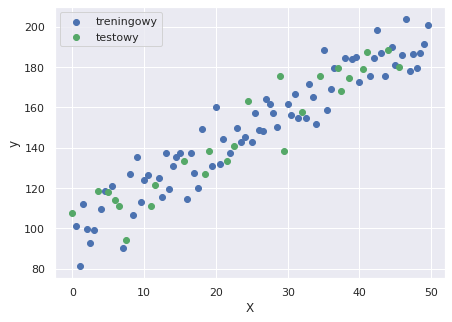

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7,5))
plt.scatter(X_train,y_train, c='b', label='treningowy')
plt.scatter(X_test,y_test, c='g', label='testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.95061874]
99.95863286093501


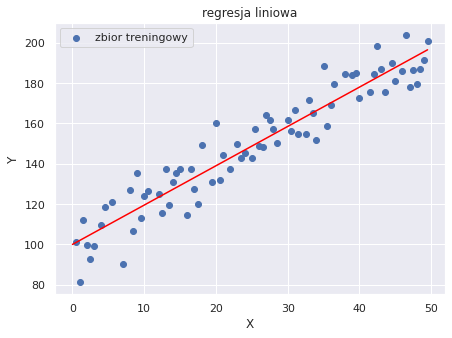

In [16]:
plt.figure(figsize=(7,5))
plt.title('regresja liniowa')
plt.scatter(X_train, y_train, c='b', label='zbior treningowy')
plt.plot(X,lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

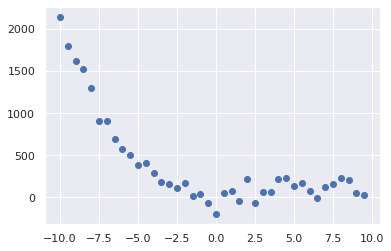

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

np.random.seed(0)
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 + 3 + noise
X = X.reshape(40, 1)
_ = plt.scatter(X, y)

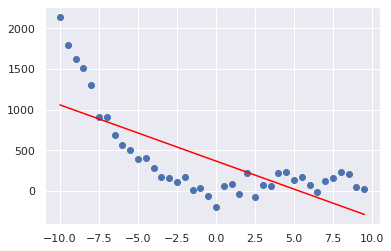

In [2]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='red')

In [3]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.525597424763327

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

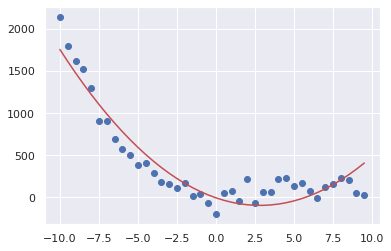

In [6]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred = regressor_poly.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='r')

In [7]:
r2_score(y, y_pred)

0.8969744381342228

In [ ]:
np.set_printoptions(suppress=True)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly

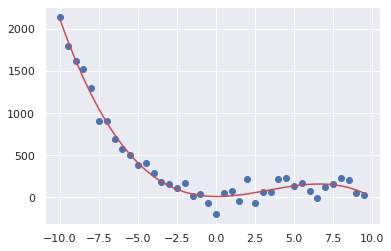

In [9]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly, y)

y_pred = regressor_poly_3.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='r')

In [10]:
r2_score(y, y_pred)

0.9786751563259088

In [12]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data)

{'data': array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [13]:
X = data.data
y = data.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [16]:
df = pd.DataFrame(data=X, columns=data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [22]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_prob = classifier.predict_proba(X_test)
y_prob

In [24]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1])

this is accuracy 0.965034965034965


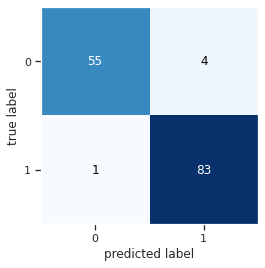

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

acc = accuracy_score(y_test, y_pred)
print(f"this is accuracy {acc}")